## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [228]:
def Vander(S):
    import numpy as np
    S = np.array(list(map(int, S.split())))
    answer = np.array(S.reshape((len(S), -1)) ** range(len(S)-1, -1, -1))
    print(answer)
    return
Vander('1 2 3 4 5')

[[  1   1   1   1   1]
 [ 16   8   4   2   1]
 [ 81  27   9   3   1]
 [256  64  16   4   1]
 [625 125  25   5   1]]


## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

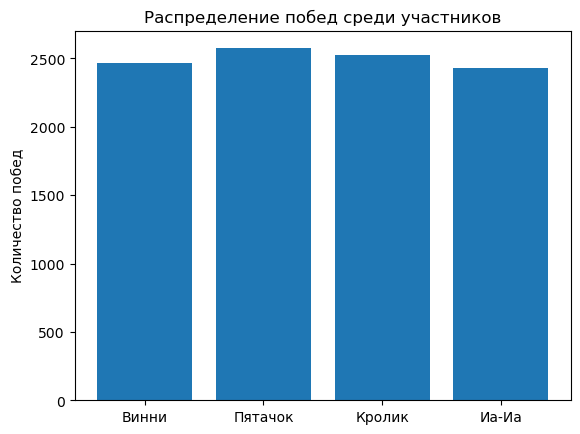

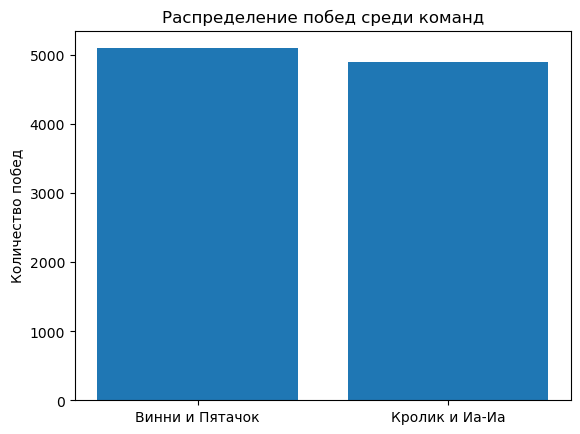

In [229]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()

#Функция генерирует матрицу, параметр х отвечает за тип матрицы(для первого либо второго задания)
def matric(x):
    N = 10 ** 4
    Hr = 100
    VN = np.random.exponential(1, size = N * Hr)
    PT = np.random.normal(1, 1, size = N * Hr)
    KR = np.random.poisson(1, size = N * Hr)
    IA = 2 * np.random.binomial(n = 1, p = 0.5, size = N * Hr)
    if x == 1:
        answer = np.array(np.hsplit(np.array([VN, PT, KR, IA]), N))
    else:
        answer = np.array(np.hsplit(np.array([VN + PT, KR + IA]), N))
    return answer

def nomer1():
    SUM = list(matric(1).sum(axis = 2).argmax(axis = 1))
    A = []
    A.append(SUM.count(0))
    A.append(SUM.count(1))
    A.append(SUM.count(2))
    A.append(SUM.count(3))
    Uch = ['Винни', 'Пятачок', 'Кролик', 'Иа-Иа']
    plt.bar(np.arange(len(Uch)), A)
    plt.xticks(np.arange(len(Uch)), Uch)
    plt.ylabel('Количество побед')
    plt.title('Распределение побед среди участников')
    plt.show()
def nomer2():
    SUM = list(matric(2).sum(axis = 2).argmax(axis = 1))
    A = []
    A.append(SUM.count(0))
    A.append(SUM.count(1))
    Uch = ['Винни и Пятачок', 'Кролик и Иа-Иа']
    plt.bar(np.arange(len(Uch)), A)
    plt.xticks(np.arange(len(Uch)), Uch)
    plt.ylabel('Количество побед')
    plt.title('Распределение побед среди команд')
    plt.show()
nomer1()
nomer2()
#Результаты логичны, т.к. мат. ожидания всех распределений равны 1, следоватьно на больших числах количество побед должно
#быть примерно равным, это подтвержается на диаграммах

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [1]:
def parse_page(search, page):
    import requests  
    from bs4 import BeautifulSoup
    import pandas as pd
    response = requests.get('https://www.avito.ru/moskva?q=' + search + '&p=' + str(page))
    tree = BeautifulSoup(response.content, 'html.parser').find_all('div', {'class' : 'description item_table-description'})
    i = 0
    tabl = []
    while i < len(tree):
        Name = tree[i].find('h3', {'class' : 'snippet-title'}).a.text
        Link = 'https://www.avito.ru/' + tree[i].find('h3', {'class' : 'snippet-title'}).a.get('href')
        Price = tree[i].find('div', {'class' : 'snippet-price-row'}).text.strip()
        Price = Price[:Price.find('₽')].replace(' ', '')
        if Price == 'Ценанеуказан': Price = 'Не указано'
        if Price == 'Бесплатн': Price = 0
        try:
            Metro = tree[i].find('span', {'class' : 'item-address-georeferences-item__content'}).text
            Rast = tree[i].find('span', {'class' : 'item-address-georeferences-item__after'}).text.strip().split()
            if Rast[1] == 'км':
                Rast[0] = int(float(Rast[0].replace(',', '.'))*1000)
            Rast = Rast[0]
        except:
            Metro = Rast = 'Не указано'
        tabl.append({'Название' : Name, 'Ссылка' : Link, 'Цена, руб' : Price, 'Метро' : Metro, 'Расстояние, м' : Rast})
        i += 1
    print(tabl)
    df = pd.DataFrame(tabl)
    return(df)

parse_page('красивые кошки', 4)

[{'Название': 'Персидская кошка', 'Ссылка': 'https://www.avito.ru//moskva/koshki/persidskaya_koshka_1927704704', 'Цена, руб': '5000', 'Метро': 'Тимирязевская', 'Расстояние, м': '200'}, {'Название': 'Кошечки в дар', 'Ссылка': 'https://www.avito.ru//moskva/koshki/koshechki_v_dar_1879160224', 'Цена, руб': '100', 'Метро': 'Не указано', 'Расстояние, м': 'Не указано'}, {'Название': 'Котёнок девочка', 'Ссылка': 'https://www.avito.ru//moskva/koshki/kotenok_devochka_1923789045', 'Цена, руб': 0, 'Метро': 'Новокосино', 'Расстояние, м': '300'}, {'Название': 'Пушистая ласковая кошка Дельфина', 'Ссылка': 'https://www.avito.ru//moskva/koshki/pushistaya_laskovaya_koshka_delfina_1852239172', 'Цена, руб': '100', 'Метро': 'Окская', 'Расстояние, м': '500'}, {'Название': 'Девочка, 11 мес', 'Ссылка': 'https://www.avito.ru//moskva/koshki/devochka_11_mes_1259360814', 'Цена, руб': '1', 'Метро': 'Бульвар Рокоссовского', 'Расстояние, м': '900'}, {'Название': 'Кошечка Рыся', 'Ссылка': 'https://www.avito.ru//moskv

,Название,Ссылка,"Цена, руб",Метро,"Расстояние, м"
0,Персидская кошка,https://www.avito.ru//moskva/koshki/persidskay...,5000,Тимирязевская,200
1,Кошечки в дар,https://www.avito.ru//moskva/koshki/koshechki_...,100,Не указано,Не указано
2,Котёнок девочка,https://www.avito.ru//moskva/koshki/kotenok_de...,0,Новокосино,300
3,Пушистая ласковая кошка Дельфина,https://www.avito.ru//moskva/koshki/pushistaya...,100,Окская,500
4,"Девочка, 11 мес",https://www.avito.ru//moskva/koshki/devochka_1...,1,Бульвар Рокоссовского,900
5,Кошечка Рыся,https://www.avito.ru//moskva/koshki/koshechka_...,Не указано,Площадь революции,400
6,Котята бездомные мальчики и девочки 1.5 мес,https://www.avito.ru//moskva/koshki/kotyata_be...,0,Бабушкинская,1600
7,Очаровательная кошка британской шиншиллы,https://www.avito.ru//moskva/koshki/ocharovate...,20000,Не указано,Не указано
8,"Ласковая, миниатюрная кошечка Халва в добрые руки",https://www.avito.ru//moskva/koshki/laskovaya_...,10,Алма-Атинская,100
9,Отдаю Трехцветную Кошку в добрые руки,https://www.avito.ru//moskva/koshki/otdayu_tre...,1,Парк Победы,100


## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [230]:
import pandas as pd
import numpy as np
tabl = 'walmart.csv'
df = pd.read_csv(tabl)
df

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667


In [132]:
print('Наблюдений:{} Переменных:{}'.format(df.shape[0], df.shape[1]))

Наблюдений:418239 Переменных:16


In [133]:
df.dtypes

Store             int64
Date             object
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [178]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667


In [224]:
df_new = df.dropna(axis = 1, thresh= 0.6 * df.shape[0])
df_new

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,192.327265,8.667


In [220]:
print('Магазины: ', len(set(df['Store'])))
print('Отделы: ', len(set(df['Dept'])))

Магазины:  45
Отделы:  81


In [181]:
print('Данные с {} по {}'.format(min(df['Date']), max(df['Date'])))

Данные с 2010-02-05 00:00:00 по 2012-10-19 00:00:00


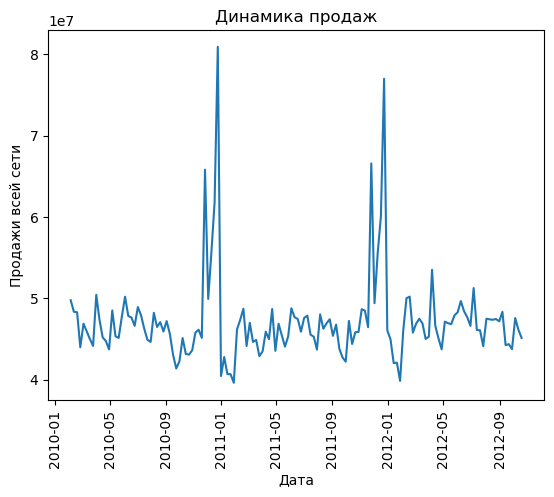

In [217]:
import matplotlib.pyplot as plt
plt.plot(df[['Date', 'Weekly_Sales']].groupby('Date').sum())
plt.title('Динамика продаж')
plt.xlabel('Дата')
plt.xticks(rotation = 90)
plt.ylabel('Продажи всей сети')
plt.show()

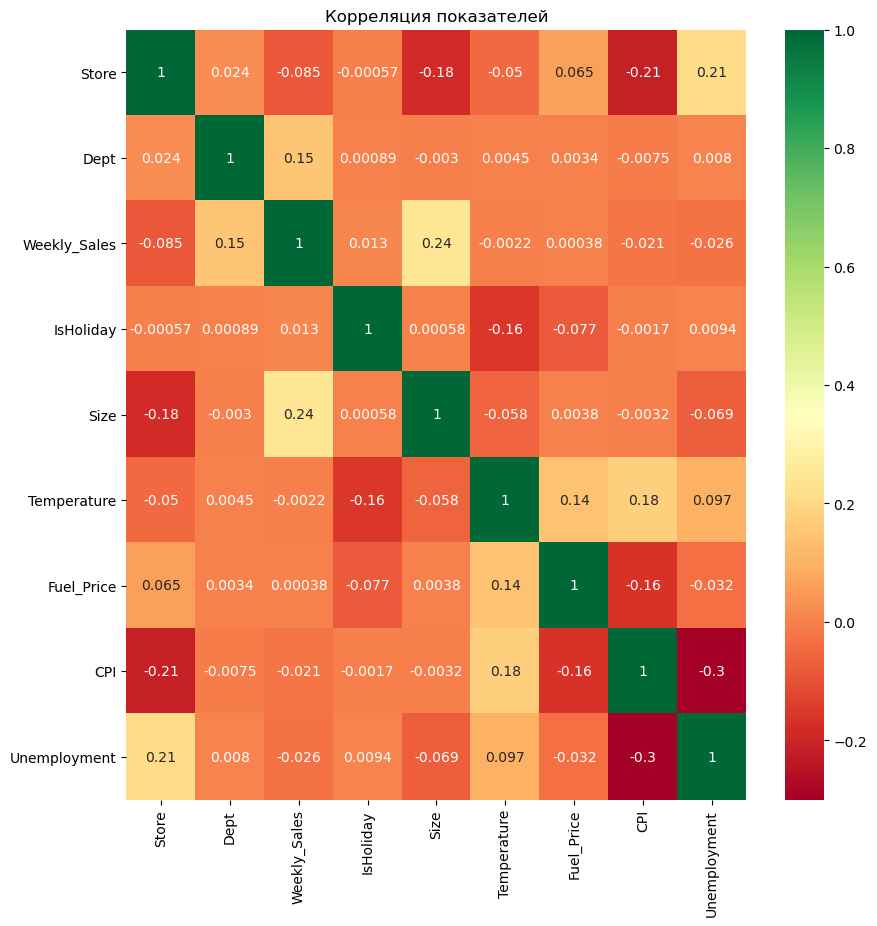

In [227]:
import seaborn as sns
plt.figure(figsize = (10 , 10))
plt.title('Корреляция показателей')
sns.heatmap(df_new.corr(), cmap='RdYlGn', annot=True)

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt 
import time
import random

token = 'место для токена'
version = '5.103'
group_id = 'draft_msk'

#Функция скачавает одну тысячу пользователей
def vk_download(method, parameters):
    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url)
    infa = response.json()
    return(infa)

#Функция скачивает N пользователей
def spisok(N):
    DATA = []
    for offset in range(0, N, 1000):
        time.sleep(0.4)
        members = vk_download('groups.getMembers', 'group_id={}&count=1000&offset={}&fields=bdate'.format(group_id, offset))
        DATA.extend(members['response']['items'])
    return(DATA)

#Функция формирует массив из необходимых дынных: первый столбец - id пользователя, второй столбец - дата и месяц рождения
#в формате (дата.месяц), третий столбец - только месяц рождения. Такой формат массива удобен при обработке, т.к. если его
#транспонировать, то мы сможем получить только дату и месяц, либо только месяц, обращаясь к конкретной строке
def Bdate(N):
    answer = []
    DATA = spisok(N)
    for i in range(0, len(DATA)):
        try:
            if DATA[i]['bdate'].count('.') == 2:
                answer.append([DATA[i]['id'], DATA[i]['bdate'][:-5], DATA[i]['bdate'][:-5].split('.')[1]])
            else:
                answer.append([DATA[i]['id'], DATA[i]['bdate'], DATA[i]['bdate'].split('.')[1]])
        except:
            pass
    return(answer)

#Функция рисует график. Входные данные: MAS - месяцы рождения
#Грфик имеет такой вид ввиду демографических особенностей
def plot(MAS):
    parametrs = []
    for i in range(1, 13):
        parametrs.append(MAS.count(str(i)))
    objects = ('Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь')[::-1]
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, parametrs)
    plt.yticks(y_pos, objects)
    plt.show()

#Функция вычисляет вероятность. Входные данные: N - количество выборок, MAS - дни и месяцы рождения
def Ver(N, MAS):
    ST = 0
    for i in range(0,N):
        A = random.sample(MAS, 50)
        B = set(A)
        if len(A) != len(B):
            ST += 1
    return(ST / N)

MASIV = Bdate(50000)
plot(list(np.transpose(MASIV)[2]))
Ver(10000, list(np.transpose(MASIV)[1]))

KeyError: 'response'